In [1]:
import numpy as np
import pandas as pd


In [2]:
df_matches = pd.read_csv('./ipl/matches.csv')
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
# df_matches.info()
df_data = df_matches[['city', 'toss_winner', 'winner', 'toss_decision']]
df_data

,city,toss_winner,winner,toss_decision
0,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,field
1,Pune,Rising Pune Supergiant,Rising Pune Supergiant,field
2,Rajkot,Kolkata Knight Riders,Kolkata Knight Riders,field
3,Indore,Kings XI Punjab,Kings XI Punjab,field
4,Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,bat
...,...,...,...,...
631,Raipur,Royal Challengers Bangalore,Royal Challengers Bangalore,field
632,Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,field
633,Delhi,Kolkata Knight Riders,Sunrisers Hyderabad,field
634,Delhi,Sunrisers Hyderabad,Sunrisers Hyderabad,field


In [4]:
# removing row with the city as nan
df_data[df_data.city.isnull()]
df_data = df_data[pd.notnull(df_data.city)]

In [5]:
# removing row with winner as nan
df_data[df_data.winner.isnull()]
df_data = df_data[pd.notnull(df_data.winner)]

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 635
Data columns (total 4 columns):
city             626 non-null object
toss_winner      626 non-null object
winner           626 non-null object
toss_decision    626 non-null object
dtypes: object(4)
memory usage: 24.5+ KB


In [7]:
# adding a column to store wining team first choice
# i.e. if toss_winner is winner set toss_decision as winner_decision

def decision(row):
    if row.toss_winner == row.winner:
        val = row.toss_decision
    else:
        if row.toss_decision == 'field':
            val = 'bat'
        else:
            val = 'field'
    return val

df_data['winner_decision'] = df_data.apply(decision, axis=1)

In [8]:
df_data.head()
df_data.info()

# count of each column is same indicating there is no unwanted or uneven data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 635
Data columns (total 5 columns):
city               626 non-null object
toss_winner        626 non-null object
winner             626 non-null object
toss_decision      626 non-null object
winner_decision    626 non-null object
dtypes: object(5)
memory usage: 29.3+ KB


In [9]:
df_data = df_data.drop(columns=['toss_winner', 'winner', 'toss_decision'])

In [10]:
df_data.head()

,city,winner_decision
0,Hyderabad,bat
1,Pune,field
2,Rajkot,field
3,Indore,field
4,Bangalore,bat


In [11]:
# creating dummy or indicator for variable of winner_decision
df_decision = pd.get_dummies(df_data.winner_decision)
df_decision.head()

,bat,field
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [12]:
df_data = df_data.drop(columns='winner_decision')
df_data = pd.concat([df_data, df_decision], axis=1)

In [13]:
df_data.head()

,city,bat,field
0,Hyderabad,1,0
1,Pune,0,1
2,Rajkot,0,1
3,Indore,0,1
4,Bangalore,1,0


In [14]:
# for each city
df_data = df_data.groupby('city').sum().reset_index()

In [15]:
# calculating percentage of winning by selecting bat or field

df_data['total'] = df_data.bat + df_data.field
df_data['bat_win'] = round(((df_data.bat / df_data.total) * 100), 2)
df_data['field_win'] = round(((df_data.field / df_data.total) * 100), 2)

In [16]:
df_data.head()

,city,bat,field,total,bat_win,field_win
0,Abu Dhabi,4,3,7,57.14,42.86
1,Ahmedabad,6,6,12,50.00,50.00
2,Bangalore,27,37,64,42.19,57.81
3,Bloemfontein,1,1,2,50.00,50.00
4,Cape Town,5,2,7,71.43,28.57


In [17]:
df_data.drop(['bat', 'field', 'total'], axis=1, inplace=True)

In [18]:
df_data

,city,bat_win,field_win
0,Abu Dhabi,57.14,42.86
1,Ahmedabad,50.00,50.00
2,Bangalore,42.19,57.81
3,Bloemfontein,50.00,50.00
4,Cape Town,71.43,28.57
5,Centurion,33.33,66.67
6,Chandigarh,43.48,56.52
7,Chennai,64.58,35.42
8,Cuttack,57.14,42.86
9,Delhi,45.76,54.24


In [19]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
city         30 non-null object
bat_win      30 non-null float64
field_win    30 non-null float64
dtypes: float64(2), object(1)
memory usage: 848.0+ bytes


In [20]:
import matplotlib.pyplot as plt

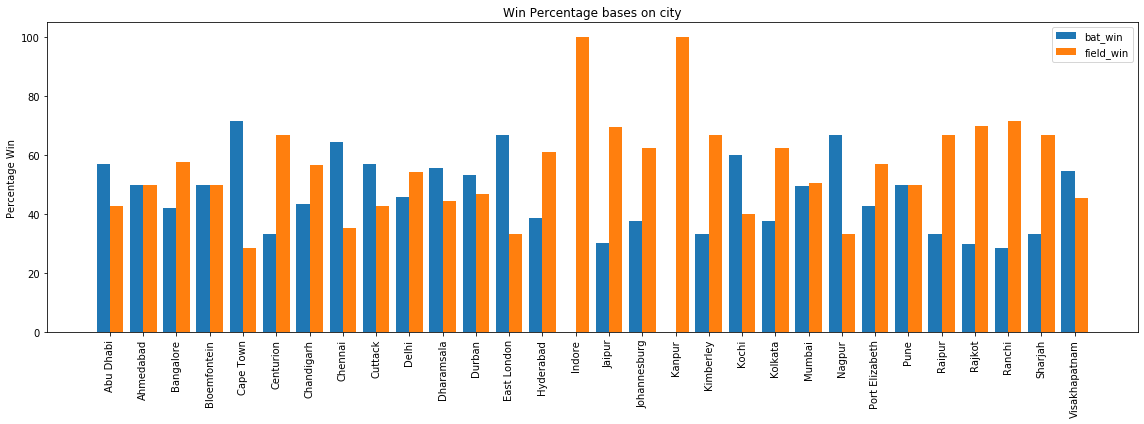

In [21]:
# group bar chart

x = np.arange(len(df_data.city))
width = 0.40

fig, ax = plt.subplots(figsize=(16, 6))
rects1 = ax.bar(x - width/2, df_data.bat_win, width, label='bat_win')
rects1 = ax.bar(x + width/2, df_data.field_win, width, label='field_win')

ax.set_ylabel('Percentage Win')
ax.set_title('Win Percentage bases on city')
ax.set_xticklabels(df_data.city)
ax.set_xticks(x)
ax.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

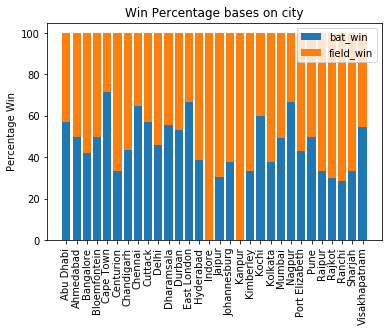

In [24]:
p1 = plt.bar(df_data.city, df_data.bat_win, label='bat_win')
p2 = plt.bar(df_data.city, df_data.field_win, bottom=df_data.bat_win, label='field_win')

plt.ylabel('Percentage Win')
plt.title('Win Percentage bases on city')
plt.legend()
plt.xticks(rotation=90)
plt.show()